In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [47]:
#Load the CSV file
df = pd.read_csv('diabetes_prediction_dataset (1).csv')

In [ ]:
#Understanding the data

In [48]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [49]:
df.tail(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [51]:
type(df)

pandas.core.frame.DataFrame

In [52]:
#Summary Statistics
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**Observation**

The dataset has 100000 rows and 9 columns.The columnss include: gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level, and diabete of which consists of 3 data types vis-a-vis: 2 objects, 3 floats and 4 integers.

In [ ]:
#Data Cleaning

In [53]:
#Checking for missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

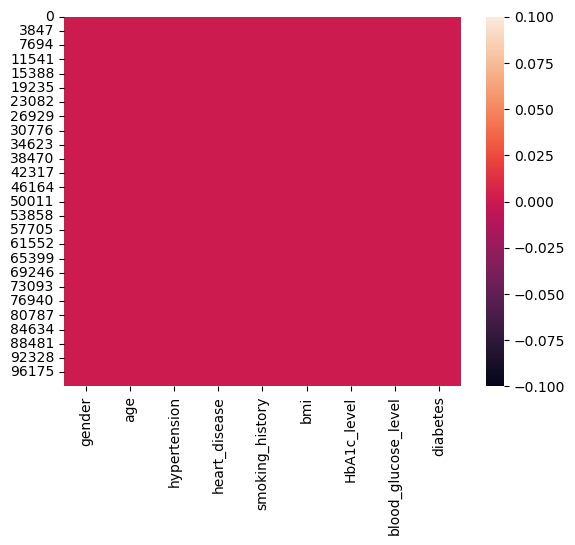

In [54]:
#Visualizing to confirm missing values
sns.heatmap(df.isnull())

**Observation**

No missing values

In [55]:
#Checking for duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [56]:
df.duplicated().sum()

3854

In [58]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [59]:
df.drop_duplicates(inplace=True)

In [60]:
df.duplicated().sum()

0

In [61]:
df.shape

(96146, 9)

**Note:**

This dataset has 3,854 duplicated records. 
After dropping the duplicates, we now have the sum of the rows of the dataset as 96146 against the 100000 rows.

In [46]:
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
Categorical Columns: ['gender', 'smoking_history']


In [ ]:
#Exploratory Data Analysis

Unique values in categorical columns:
gender: ['Female' 'Male' 'Other']
smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Distribution of diabetes:
diabetes
0    91500
1     8500
Name: count, dtype: int64
Percentage of diabetes cases: 8.50%


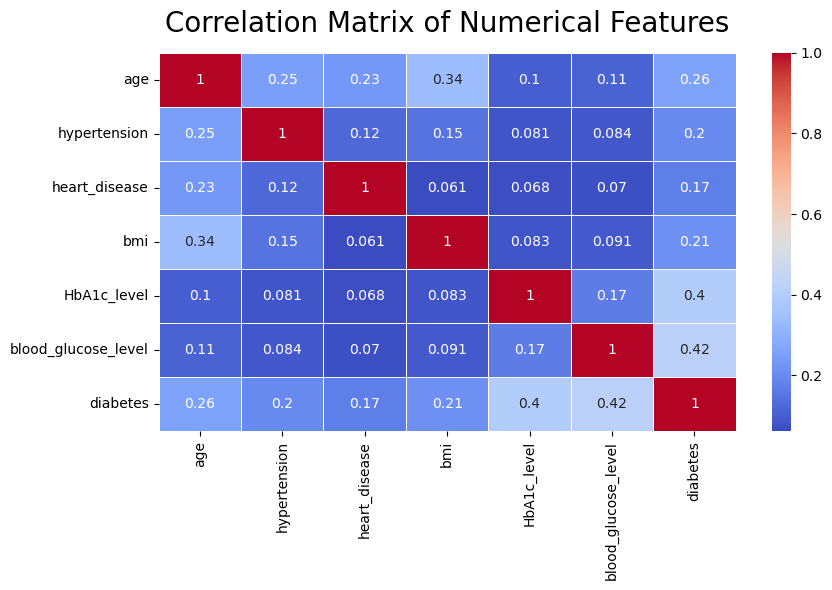

Correlation analysis complete.


In [64]:
# Set the style for the plots
plt.style.use('default')


# Check unique values in categorical columns
print("\
Unique values in categorical columns:")
for col in ['gender', 'smoking_history']:
    print(f"{col}: {df[col].unique()}")

# Check the distribution of the target variable
print("\
Distribution of diabetes:")
print(df['diabetes'].value_counts())
print(f"Percentage of diabetes cases: {df['diabetes'].mean() * 100:.2f}%")

# Display the correlation matrix
plt.figure(figsize=(9, 6))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=20, pad=15)
plt.tight_layout()
plt.show()

print("Correlation analysis complete.")

In [ ]:
#performing Univariate Analysis

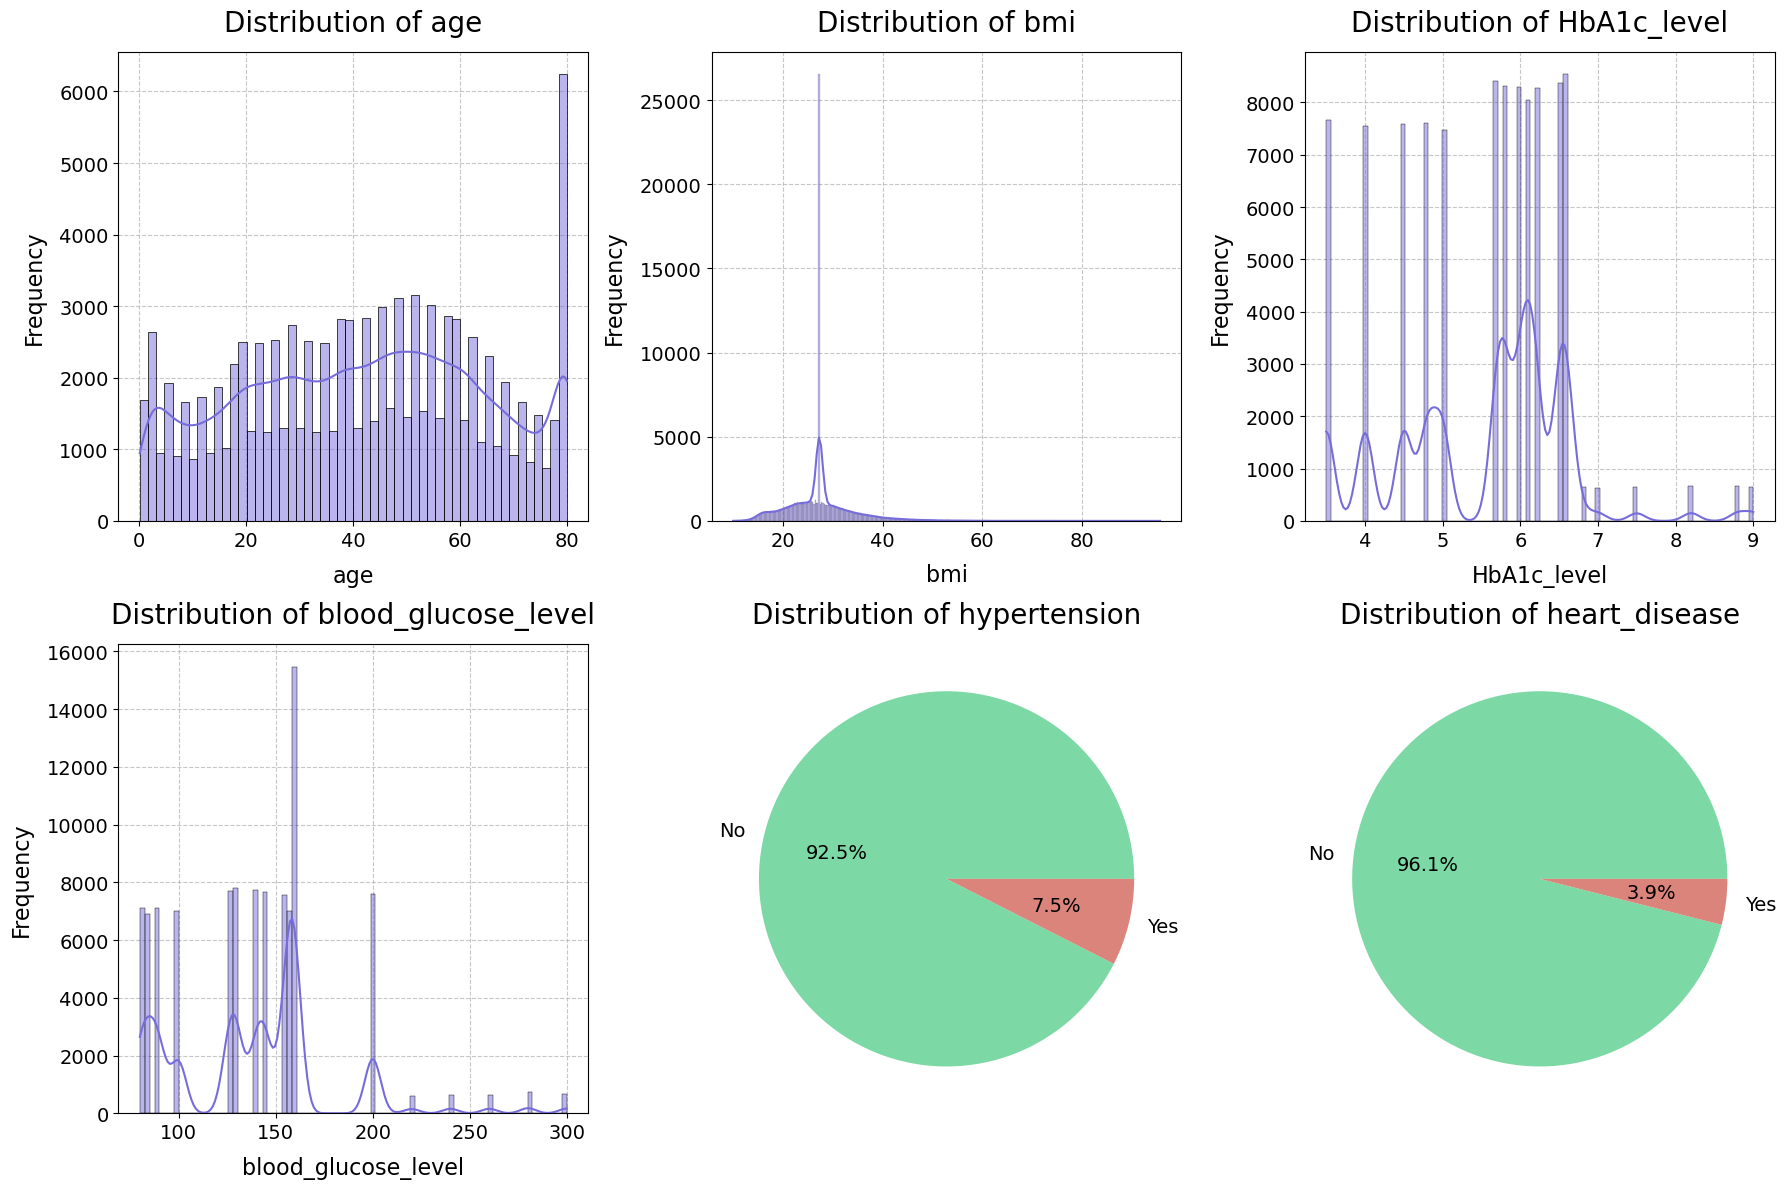

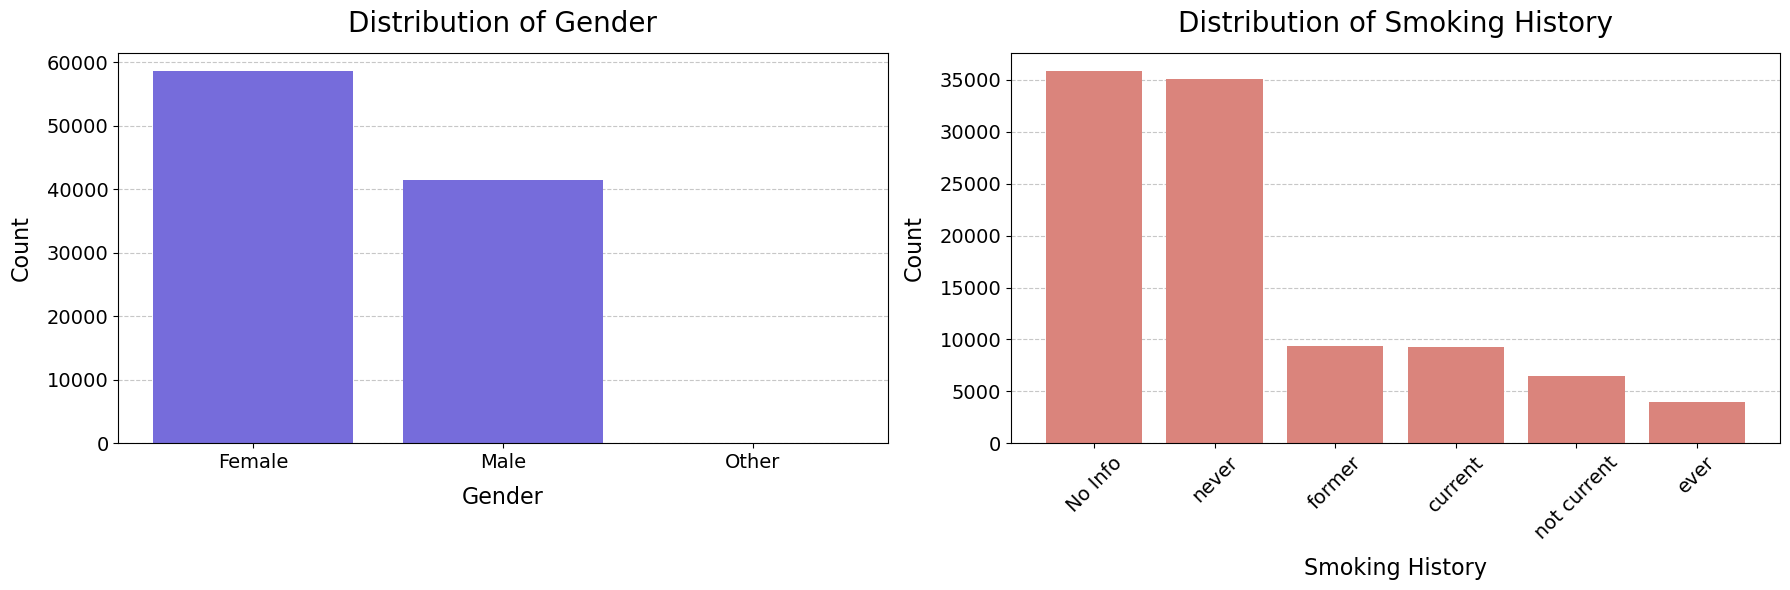

Univariate analysis complete.


In [69]:
# Univariate Analysis for Numerical Features

# Setting up the figure for numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Numerical columns to analyze
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Plot histograms for numerical features
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='#766CDB')
    axes[i].set_title(f'Distribution of {col}', fontsize=20, pad=15)
    axes[i].set_xlabel(col, fontsize=16, labelpad=10)
    axes[i].set_ylabel('Frequency', fontsize=16, labelpad=10)
    axes[i].tick_params(labelsize=14)
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].set_axisbelow(True)

# Plot pie charts for binary features
for i, col in enumerate(['hypertension', 'heart_disease'], start=4):
    counts = df[col].value_counts()
    axes[i].pie(counts, labels=['No', 'Yes'], autopct='%1.1f%%', 
                colors=['#7CD9A5', '#DA847C'], textprops={'fontsize': 14})
    axes[i].set_title(f'Distribution of {col}', fontsize=20, pad=15)

plt.tight_layout()
plt.show()

# Categorical features analysis
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gender distribution
gender_counts = df['gender'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values, color='#766CDB')
axes[0].set_title('Distribution of Gender', fontsize=20, pad=15)
axes[0].set_xlabel('Gender', fontsize=16, labelpad=10)
axes[0].set_ylabel('Count', fontsize=16, labelpad=10)
axes[0].tick_params(labelsize=14)
axes[0].grid(True, linestyle='--', alpha=0.7, axis='y')
axes[0].set_axisbelow(True)

# Smoking history distribution
smoking_counts = df['smoking_history'].value_counts()
axes[1].bar(smoking_counts.index, smoking_counts.values, color='#DA847C')
axes[1].set_title('Distribution of Smoking History', fontsize=20, pad=15)
axes[1].set_xlabel('Smoking History', fontsize=16, labelpad=10)
axes[1].set_ylabel('Count', fontsize=16, labelpad=10)
axes[1].tick_params(labelsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7, axis='y')
axes[1].set_axisbelow(True)

plt.tight_layout()
plt.show()

print("Univariate analysis complete.")

In [ ]:
# Performing Bivariate Analysis - Relationship between features and diabetes

C:\Users\HP\AppData\Local\Temp\ipykernel_21768\569965768.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=col, data=df, ax=axes[i], palette=['#7CD9A5', '#DA847C'])
C:\Users\HP\AppData\Local\Temp\ipykernel_21768\569965768.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['No Diabetes', 'Diabetes'])
C:\Users\HP\AppData\Local\Temp\ipykernel_21768\569965768.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=col, data=df, ax=axes[i], palette=['#7CD9A5', '#DA847C'])
C:\Users\HP\AppData\Local\Temp\ipykernel_21768\569965768.py:15: UserWarning: set_ti

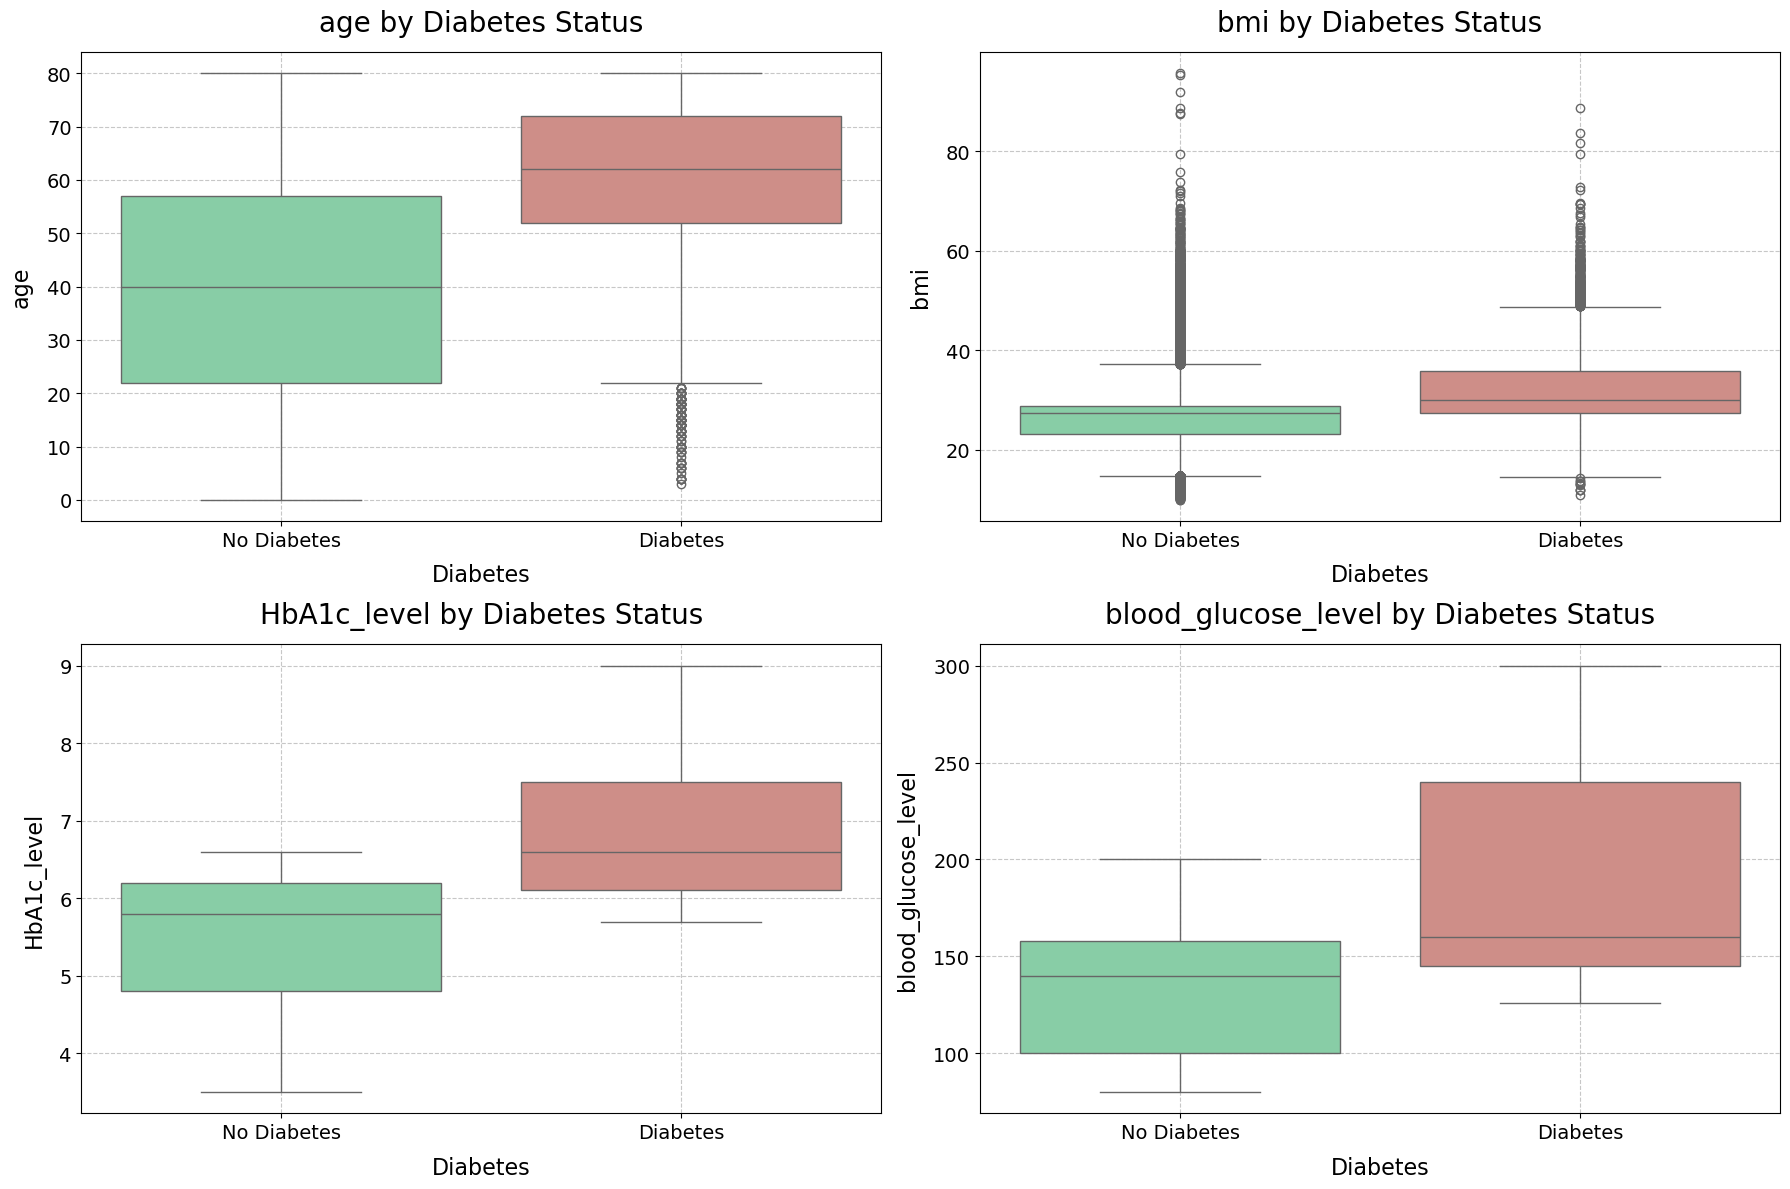

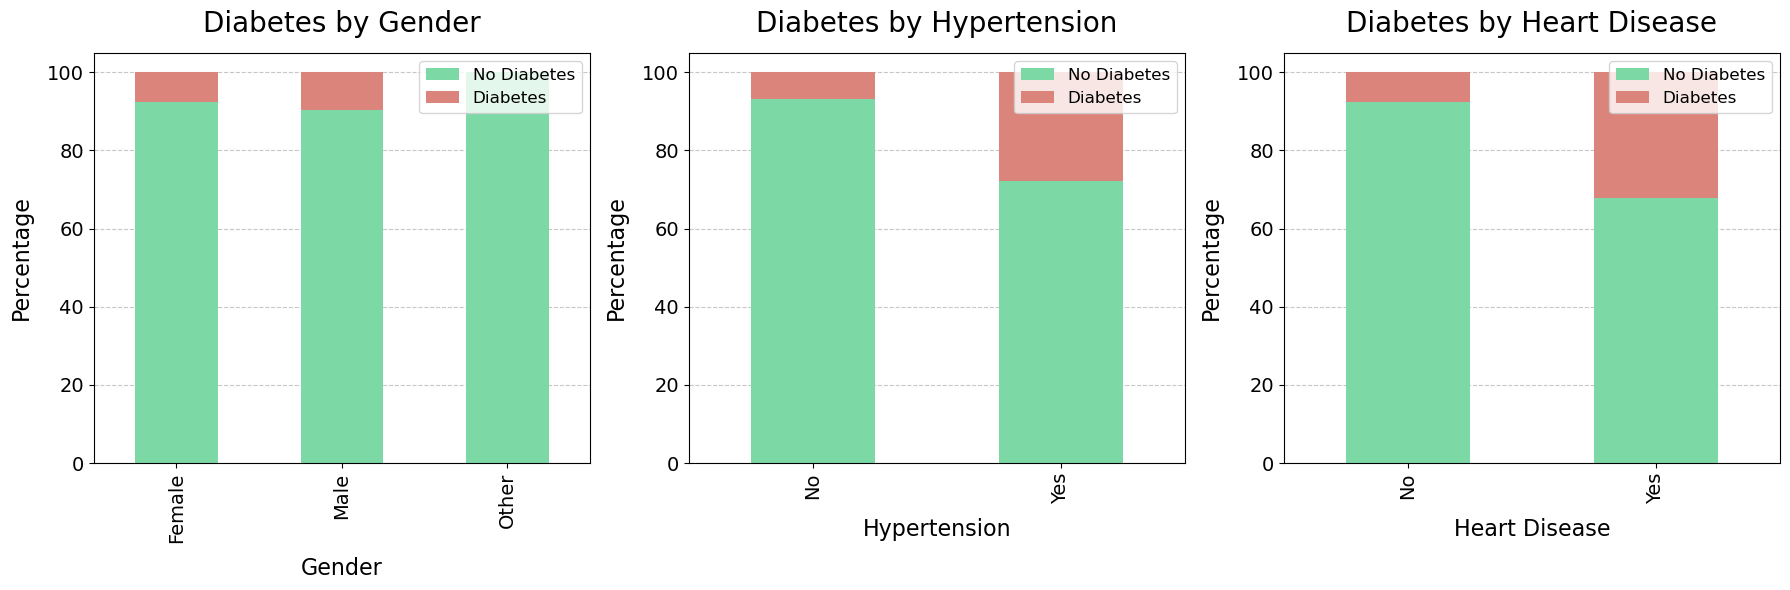

<Figure size 1200x600 with 0 Axes>

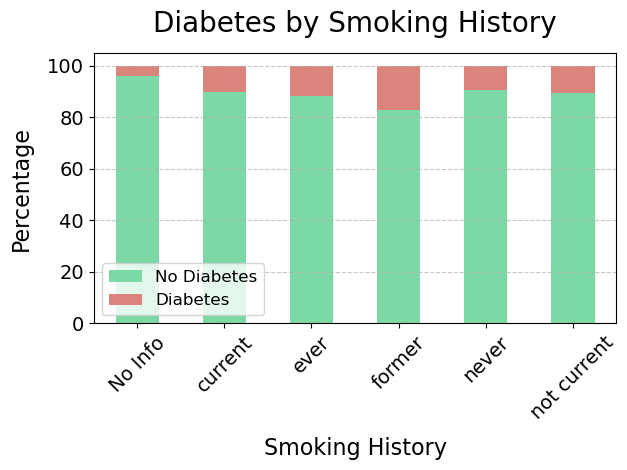

Bivariate analysis complete.


In [70]:
# Set up the figure for numerical features vs diabetes
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Numerical columns to analyze
num_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Plot boxplots for numerical features by diabetes status
for i, col in enumerate(num_cols):
    sns.boxplot(x='diabetes', y=col, data=df, ax=axes[i], palette=['#7CD9A5', '#DA847C'])
    axes[i].set_title(f'{col} by Diabetes Status', fontsize=20, pad=15)
    axes[i].set_xlabel('Diabetes', fontsize=16, labelpad=10)
    axes[i].set_ylabel(col, fontsize=16, labelpad=10)
    axes[i].tick_params(labelsize=14)
    axes[i].set_xticklabels(['No Diabetes', 'Diabetes'])
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].set_axisbelow(True)

plt.tight_layout()
plt.show()

# Categorical features vs diabetes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gender vs diabetes
gender_diabetes = pd.crosstab(df['gender'], df['diabetes'])
gender_diabetes_pct = gender_diabetes.div(gender_diabetes.sum(axis=1), axis=0) * 100
gender_diabetes_pct.plot(kind='bar', stacked=True, ax=axes[0], color=['#7CD9A5', '#DA847C'])
axes[0].set_title('Diabetes by Gender', fontsize=20, pad=15)
axes[0].set_xlabel('Gender', fontsize=16, labelpad=10)
axes[0].set_ylabel('Percentage', fontsize=16, labelpad=10)
axes[0].tick_params(labelsize=14)
axes[0].legend(['No Diabetes', 'Diabetes'], fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.7, axis='y')
axes[0].set_axisbelow(True)

# Hypertension vs diabetes
hypertension_diabetes = pd.crosstab(df['hypertension'], df['diabetes'])
hypertension_diabetes_pct = hypertension_diabetes.div(hypertension_diabetes.sum(axis=1), axis=0) * 100
hypertension_diabetes_pct.plot(kind='bar', stacked=True, ax=axes[1], color=['#7CD9A5', '#DA847C'])
axes[1].set_title('Diabetes by Hypertension', fontsize=20, pad=15)
axes[1].set_xlabel('Hypertension', fontsize=16, labelpad=10)
axes[1].set_ylabel('Percentage', fontsize=16, labelpad=10)
axes[1].tick_params(labelsize=14)
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].legend(['No Diabetes', 'Diabetes'], fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7, axis='y')
axes[1].set_axisbelow(True)

# Heart disease vs diabetes
heart_diabetes = pd.crosstab(df['heart_disease'], df['diabetes'])
heart_diabetes_pct = heart_diabetes.div(heart_diabetes.sum(axis=1), axis=0) * 100
heart_diabetes_pct.plot(kind='bar', stacked=True, ax=axes[2], color=['#7CD9A5', '#DA847C'])
axes[2].set_title('Diabetes by Heart Disease', fontsize=20, pad=15)
axes[2].set_xlabel('Heart Disease', fontsize=16, labelpad=10)
axes[2].set_ylabel('Percentage', fontsize=16, labelpad=10)
axes[2].tick_params(labelsize=14)
axes[2].set_xticklabels(['No', 'Yes'])
axes[2].legend(['No Diabetes', 'Diabetes'], fontsize=12)
axes[2].grid(True, linestyle='--', alpha=0.7, axis='y')
axes[2].set_axisbelow(True)

plt.tight_layout()
plt.show()

# Smoking history vs diabetes
plt.figure(figsize=(12, 6))
smoking_diabetes = pd.crosstab(df['smoking_history'], df['diabetes'])
smoking_diabetes_pct = smoking_diabetes.div(smoking_diabetes.sum(axis=1), axis=0) * 100
smoking_diabetes_pct.plot(kind='bar', stacked=True, color=['#7CD9A5', '#DA847C'])
plt.title('Diabetes by Smoking History', fontsize=20, pad=15)
plt.xlabel('Smoking History', fontsize=16, labelpad=10)
plt.ylabel('Percentage', fontsize=16, labelpad=10)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['No Diabetes', 'Diabetes'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.show()

print("Bivariate analysis complete.")

In [ ]:
#Performing Feature Engineering and Preprocessing on the dataset

Original dataset shape: (100000, 9)
Dataset shape after removing duplicates: (96146, 9)
Sample of data with engineered features:
    age age_group    bmi bmi_category smoking_history smoking_status  \
0  80.0       65+  25.19   Overweight           never          Never   
1  54.0     51-65  27.32   Overweight         No Info        Unknown   
2  28.0     19-35  27.32   Overweight           never          Never   
3  36.0     36-50  23.45       Normal         current        Current   
4  76.0       65+  20.14       Normal         current        Current   

   hypertension  heart_disease  risk_factors  HbA1c_level HbA1c_category  \
0             0              1             1          6.6       Diabetes   
1             0              0             0          6.6       Diabetes   
2             0              0             0          5.7         Normal   
3             0              0             0          5.0         Normal   
4             1              1             2          4.8 

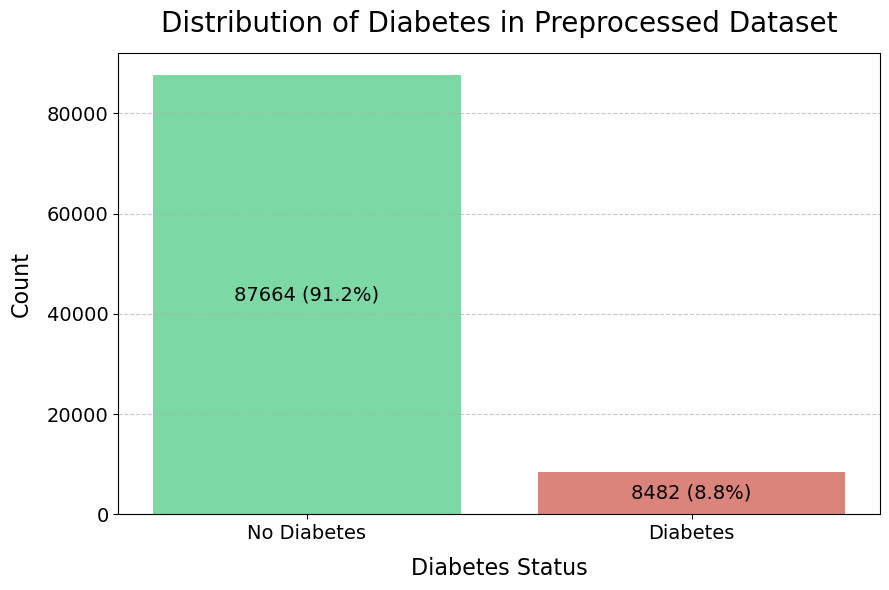

Feature engineering and preprocessing complete.


In [73]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Read the dataset
df = pd.read_csv('diabetes_prediction_dataset (1).csv')

# Remove duplicates
df_clean = df.drop_duplicates().reset_index(drop=True)
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing duplicates: {df_clean.shape}")

# Feature Engineering
# 1. Create age groups
df_clean['age_group'] = pd.cut(df_clean['age'], 
                              bins=[0, 18, 35, 50, 65, 100],
                              labels=['0-18', '19-35', '36-50', '51-65', '65+'])

# 2. Create BMI categories according to WHO standards
df_clean['bmi_category'] = pd.cut(df_clean['bmi'], 
                                 bins=[0, 18.5, 25, 30, 35, 100],
                                 labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese'])

# 3. Simplify smoking history
df_clean['smoking_status'] = df_clean['smoking_history'].replace({
    'never': 'Never',
    'No Info': 'Unknown',
    'current': 'Current',
    'former': 'Former',
    'ever': 'Former',
    'not current': 'Former'
})

# 4. Create a combined risk factor column
df_clean['risk_factors'] = df_clean['hypertension'] + df_clean['heart_disease']

# 5. Create HbA1c categories
df_clean['HbA1c_category'] = pd.cut(df_clean['HbA1c_level'], 
                                   bins=[0, 5.7, 6.5, 15],
                                   labels=['Normal', 'Prediabetes', 'Diabetes'])

# 6. Create blood glucose categories
df_clean['glucose_category'] = pd.cut(df_clean['blood_glucose_level'], 
                                     bins=[0, 100, 126, 500],
                                     labels=['Normal', 'Prediabetes', 'Diabetes'])

# Display the engineered features
print("\
Sample of data with engineered features:")
print(df_clean[['age', 'age_group', 'bmi', 'bmi_category', 'smoking_history', 
                'smoking_status', 'hypertension', 'heart_disease', 'risk_factors', 
                'HbA1c_level', 'HbA1c_category', 'blood_glucose_level', 
                'glucose_category', 'diabetes']].head())

# Prepare data for modeling
# Define features and target
X = df_clean.drop('diabetes', axis=1)
y = df_clean['diabetes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\
Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Percentage of diabetes cases in training set: {:.2f}%".format(y_train.mean() * 100))
print("Percentage of diabetes cases in testing set: {:.2f}%".format(y_test.mean() * 100))

# Define preprocessing for numerical and categorical features
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'smoking_status']

# Save the preprocessed data for modeling
df_clean.to_csv('diabetes_preprocessed.csv', index=False)
print("\
Preprocessed data saved to 'diabetes_preprocessed.csv'")

# Display the distribution of the target variable in the preprocessed dataset
plt.figure(figsize=(9, 6))
diabetes_counts = df_clean['diabetes'].value_counts()
plt.bar(['No Diabetes', 'Diabetes'], diabetes_counts.values, color=['#7CD9A5', '#DA847C'])
plt.title('Distribution of Diabetes in Preprocessed Dataset', fontsize=20, pad=15)
plt.xlabel('Diabetes Status', fontsize=16, labelpad=10)
plt.ylabel('Count', fontsize=16, labelpad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.text(0, diabetes_counts[0]/2, f"{diabetes_counts[0]} ({diabetes_counts[0]/sum(diabetes_counts.values)*100:.1f}%)", 
         ha='center', va='center', fontsize=14, color='black')
plt.text(1, diabetes_counts[1]/2, f"{diabetes_counts[1]} ({diabetes_counts[1]/sum(diabetes_counts.values)*100:.1f}%)", 
         ha='center', va='center', fontsize=14, color='black')
plt.tight_layout()
plt.show()

print("Feature engineering and preprocessing complete.")

In [ ]:
#Training and Evaluating Multiple Classification Models

In [82]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Define features and target
# We use the engineered numerical data: age, bmi, HbA1c_level, blood_glucose_level, hypertension, heart_disease, risk_factors
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'risk_factors']
X = df[features]
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Scale features for models that are sensitive to scale (Logistic Regression, SVM, XGBoost benefits as well)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Train models and evaluate
models = {
    'Logistic Regression': (log_reg, X_train_scaled, X_test_scaled),
    'Random Forest': (rf_model, X_train, X_test),
    'XGBoost': (xgb_model, X_train_scaled, X_test_scaled),
    'SVM': (svm_model, X_train_scaled, X_test_scaled)
}

results = []

for model_name, (model, X_tr, X_te) in models.items():
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'ROC AUC': roc_auc,
        'F1 Score': f1,
        'Confusion Matrix': cm
    })
    print('--- ' + model_name + ' ---')
    print('Accuracy:', acc)
    print('ROC AUC:', roc_auc)
    print('F1 Score:', f1)
    print('Confusion Matrix:\
', cm)
    print('-----------------------------------\
')

results_df = pd.DataFrame(results)

# Save the results dataframe to a CSV file
results_df.to_csv('model_results.csv', index=False)
print('Models trained and evaluated. Results saved to model_results.csv')

--- Logistic Regression ---
Accuracy: 0.9591263650546021
ROC AUC: 0.9593284126150595
F1 Score: 0.7322888283378747
Confusion Matrix: [[17369   165]
 [  621  1075]]
-----------------------------------
--- Random Forest ---
Accuracy: 0.9676547061882476
ROC AUC: 0.9543493227981863
F1 Score: 0.7926666666666666
Confusion Matrix: [[17419   115]
 [  507  1189]]
-----------------------------------


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:57:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost ---
Accuracy: 0.970566822672907
ROC AUC: 0.9755506350465188
F1 Score: 0.8076138681169273
Confusion Matrix: [[17476    58]
 [  508  1188]]
-----------------------------------
--- SVM ---
Accuracy: 0.9636505460218409
ROC AUC: 0.9281299634026399
F1 Score: 0.7444241316270567
Confusion Matrix: [[17513    21]
 [  678  1018]]
-----------------------------------
Models trained and evaluated. Results saved to model_results.csv


In [79]:
#Installing XGBoost
%pip install xgboost
print('xgboost installed successfully.')

xgboost installed successfully.



In [ ]:
#Checking for preprosessed diabetes data

In [80]:
# First, let's check if the preprocessed file exists, if not, we need to preprocess the data
import os
import pandas as pd

if os.path.exists('diabetes_preprocessed.csv'):
    print("Preprocessed file exists, loading it...")
    df = pd.read_csv('diabetes_preprocessed.csv')
else:
    print("Preprocessed file doesn't exist, loading and preprocessing the original data...")
    # Load the original data
    df = pd.read_csv('diabetes_prediction_dataset (1).csv')
    
    # Display the first few rows to understand the data
    print("Original data head:")
    print(df.head())
    
    # Check for missing values
    print("\
Missing values:")
    print(df.isnull().sum())
    
    # Check data types
    print("\
Data types:")
    print(df.dtypes)
    
print("Dataset shape:", df.shape)

Preprocessed file exists, loading it...
Dataset shape: (96146, 15)


In [ ]:
#Training and evaluating models using Logistic Regression, Random Forest, XGBoost, and SVM

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Load the preprocessed data
df = pd.read_csv('diabetes_preprocessed.csv')

# Define features and target
# Assuming that the following engineered features exist in the preprocessed data
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'risk_factors']

# Before proceeding, checking that all features exist in the dataframe
missing_features = list(set(features) - set(df.columns))
if missing_features:
    print('Missing features:', missing_features)
else:
    print('All features are present.')

X = df[features]
y = df['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Scale features for models sensitive to scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Dictionary to store models and their corresponding feature sets
models = {
    'Logistic Regression': (log_reg, X_train_scaled, X_test_scaled),
    'Random Forest': (rf_model, X_train, X_test),
    'XGBoost': (xgb_model, X_train_scaled, X_test_scaled),
    'SVM': (svm_model, X_train_scaled, X_test_scaled)
}

results = []

for model_name, (model, X_tr, X_te) in models.items():
    print('--- ' + model_name + ' ---')
    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'ROC AUC': roc_auc,
        'F1 Score': f1,
        'Confusion Matrix': cm
    })
    print('Accuracy:', acc)
    print('ROC AUC:', roc_auc)
    print('F1 Score:', f1)
    print('Confusion Matrix:\
', cm)
    print('-----------------------------------\
')

results_df = pd.DataFrame(results)

# Save the results dataframe to a CSV file
results_df.to_csv('model_results.csv', index=False)
print('Models trained and evaluated. Results saved to model_results.csv')

print('Model Evaluation Results:')
print(results_df)

All features are present.
--- Logistic Regression ---
Accuracy: 0.9591263650546021
ROC AUC: 0.9593284126150595
F1 Score: 0.7322888283378747
Confusion Matrix: [[17369   165]
 [  621  1075]]
-----------------------------------
--- Random Forest ---
Accuracy: 0.9676547061882476
ROC AUC: 0.9543493227981863
F1 Score: 0.7926666666666666
Confusion Matrix: [[17419   115]
 [  507  1189]]
-----------------------------------
--- XGBoost ---


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:45:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.970566822672907
ROC AUC: 0.9755506350465188
F1 Score: 0.8076138681169273
Confusion Matrix: [[17476    58]
 [  508  1188]]
-----------------------------------
--- SVM ---
Accuracy: 0.9636505460218409
ROC AUC: 0.9281299634026399
F1 Score: 0.7444241316270567
Confusion Matrix: [[17513    21]
 [  678  1018]]
-----------------------------------
Models trained and evaluated. Results saved to model_results.csv
Model Evaluation Results:
                 Model  Accuracy   ROC AUC  F1 Score  \
0  Logistic Regression  0.959126  0.959328  0.732289   
1        Random Forest  0.967655  0.954349  0.792667   
2              XGBoost  0.970567  0.975551  0.807614   
3                  SVM  0.963651  0.928130  0.744424   

              Confusion Matrix  
0  [[17369, 165], [621, 1075]]  
1  [[17419, 115], [507, 1189]]  
2   [[17476, 58], [508, 1188]]  
3   [[17513, 21], [678, 1018]]  
